# Reconstructing noisy image example

An example of using scipy routines to create and (naïvely) reconstruct noisy images.  This also serves to demonstrate plotting images and using subplots.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage, stats, interpolate

# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 12)

# handy function
def noticks():
    ax = plt.gca()
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

In [2]:
# create a set of randomly distributed point sources
n = 100
np.random.seed(12345)
sources = stats.poisson.rvs(0.01, size=(n, n)).astype(np.float)
# apply a point spread function
image = ndimage.gaussian_filter(sources, 3, mode='constant')
# add some noise
noisy = image + stats.norm.rvs(0.0, 0.01, size=(n, n))

In [3]:
# attempt to reconstruct the image in a few simple ways
noisy_rec_g = ndimage.gaussian_filter(noisy, 2, mode='constant')
noisy_rec_m = ndimage.median_filter(noisy, 5, mode='constant')
noisy_rec_u = ndimage.uniform_filter(noisy, 5, mode='constant')

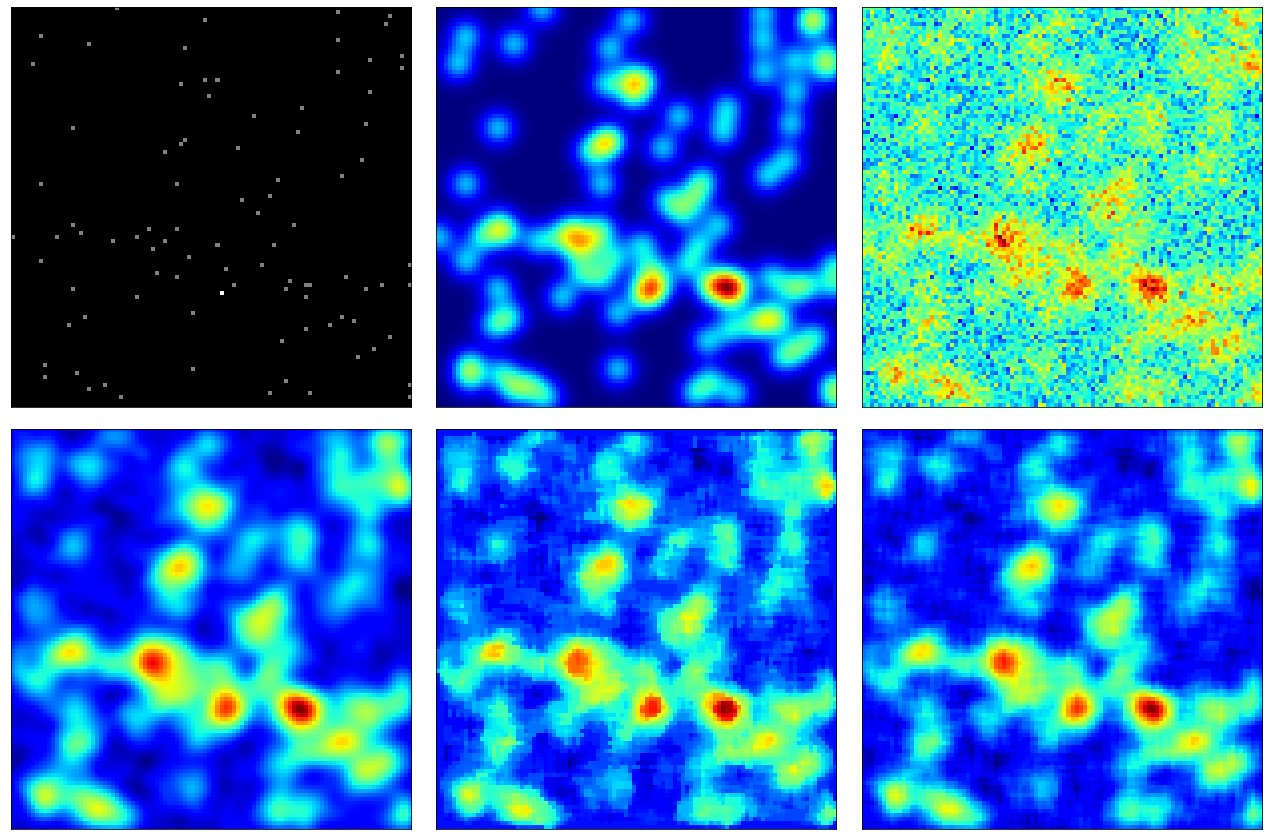

In [4]:
for i, img in enumerate([sources, image, noisy, noisy_rec_g, noisy_rec_m, noisy_rec_u]):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, interpolation=None)
    if i == 0:
        plt.gray()
    else:
        plt.jet()
    noticks()
plt.tight_layout()

In [5]:
# sparsely sample the above images at some random points
p, q = np.random.random_integers(n-1, size=(2, 1000))
image_samples = image[p, q]
noisy_samples = noisy[p, q]

<ipython-input-5-e9a7dd7e3b15>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 99 + 1) instead
  p, q = np.random.random_integers(n-1, size=(2, 1000))


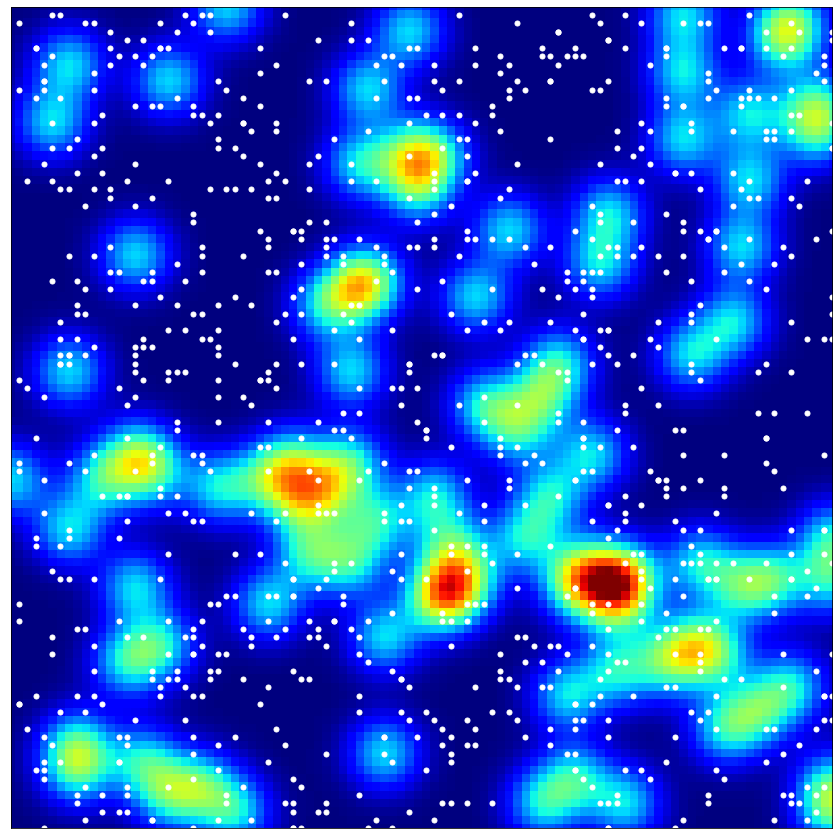

In [6]:
# plot to illustrate sampling
# ensure consistent colour map scaling
vmin = stats.scoreatpercentile(image.ravel(), 0.01)
vmax = stats.scoreatpercentile(image.ravel(), 99.9)
plt.imshow(image, interpolation=None, vmin=vmin, vmax=vmax)
plt.plot(p, q, 'ow', markersize=5)
plt.axis([0, n-1, n-1, 0])
noticks()
plt.tight_layout()

In [7]:
# create index grids
grid_x, grid_y = np.mgrid[0:n, 0:n]
print(grid_x)
print(grid_y)

[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]
[[ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 ...
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]]


In [8]:
interpolate.griddata?

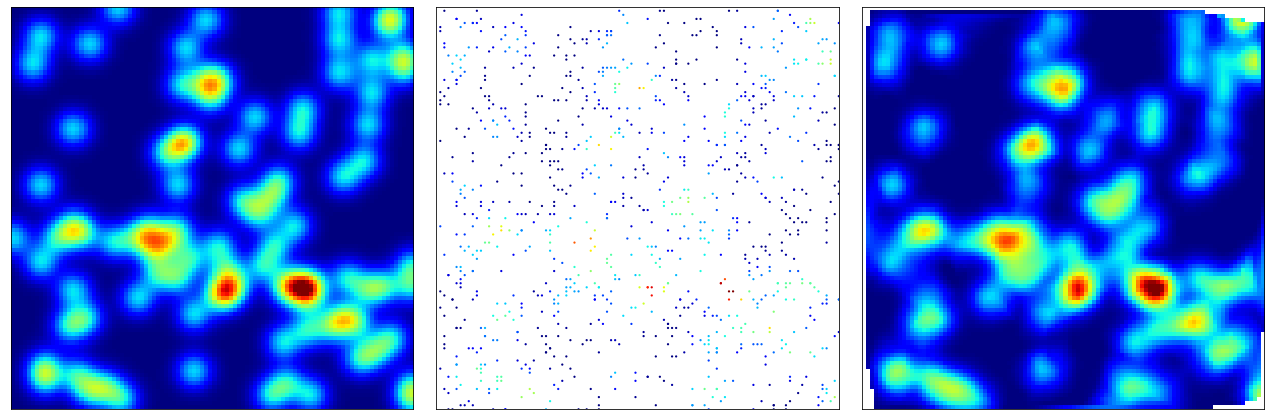

In [9]:
# exact interpolation of samples from noiseless image
image_rec_interp = interpolate.griddata((p, q), image_samples, (grid_x, grid_y), method='cubic')
# plot
plt.subplot(1, 3, 1)
plt.imshow(image, interpolation=None, vmin=vmin, vmax=vmax)
noticks()
plt.subplot(1, 3, 2)
# note that imshow switches x and y axes and plots y axis upside down!
plt.scatter(q, p, c=image_samples, s=5, vmin=vmin, vmax=vmax, edgecolor='none')
plt.axis('scaled')
plt.axis((0, n-1, n-1, 0))
noticks()
plt.subplot(1, 3, 3)
plt.imshow(image_rec_interp, interpolation=None, vmin=vmin, vmax=vmax)
noticks()
plt.tight_layout()

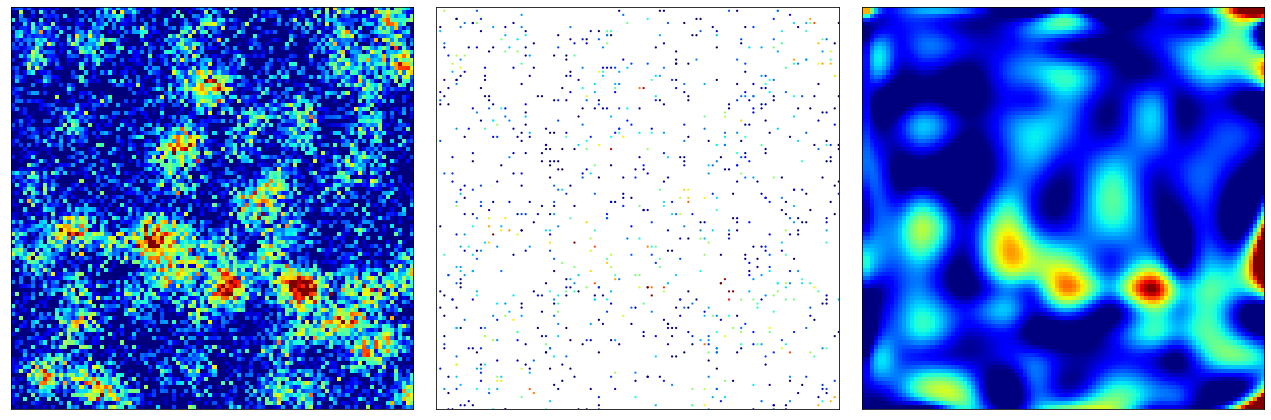

In [10]:
# spline fit to samples from noisy image
noisy_spline = interpolate.bisplrep(p, q, noisy_samples, s=0.1, full_output=True)
noisy_rec_spline = interpolate.bisplev(np.arange(n), np.arange(n), noisy_spline[0])
# plot
plt.subplot(1, 3, 1)
plt.imshow(noisy, interpolation=None, vmin=vmin, vmax=vmax)
noticks()
plt.subplot(1, 3, 2)
# note that imshow switches x and y axes and plots y axis upside down!
plt.scatter(q, p, c=noisy_samples, s=5, vmin=vmin, vmax=vmax, edgecolor='none')
plt.axis('scaled')
plt.axis((0, n-1, n-1, 0))
noticks()
plt.subplot(1, 3, 3)
plt.imshow(noisy_rec_spline, interpolation=None, vmin=vmin, vmax=vmax)
noticks()
plt.tight_layout()